In [33]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

In [62]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
pept=[x.split('_1_')[0] for x in os.listdir(path) if ((".csv" in x) and ("_1_" in x)) ]
ph=1.5574E-4


 _LDPGSPELQQVLK_2 Time 31 ==================================>


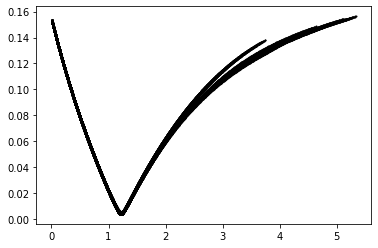

pxt*NEH = 1.21909854 real_NEH= 26 ratio = 0.04688840538461539 

vals 1.1922768337020286


In [66]:
time=31
protien="FAS_MOUSE"
# protien="ACADV_MOUSE"
pep=pept[4]
print(f"\n {pep} Time",time,"==================================>")
data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{time}_{protien}.csv")

data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)
data=data[data.NEH<=data.NH]

plt.scatter(data.const,data.RMSE,s=1,c='k')
#             plt.hlines(y=2.5*min(data.RMSE),xmin=min(data.const),xmax=max(data.const),color='r')
plt.show()

print("pxt*NEH =",float(data[data.RMSE==min(data.RMSE)].const),"real_NEH=",data.T_NEH[0], "ratio =",float(data[data.RMSE==min(data.RMSE)].const/data.T_NEH[0]),"\n")
print("vals",(data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))

# pxt_neh.append(float(data[data.RMSE==min(data.RMSE)].const))
 
# tempdata=data[data.RMSE<2.5*min(data.RMSE)]
# tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
# tempdata["pxt_dif"]=((abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2)**0.5 #(abs((tempdata.pxt) - (tempdata.new_pxt))) 
# tempdata=tempdata.sort_values(by=["pxt_dif"]) 
# neh_coll=neh_coll+list(np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))

In [67]:
# data.sort_values(by='RMSE')
const=float(data[data.RMSE==min(data.RMSE)].const)
ria_t=float(data[data.RMSE==min(data.RMSE)].ria_t)
ria_0=float(data[data.RMSE==min(data.RMSE)].ria_0)
NH=float(data[data.RMSE==min(data.RMSE)].NH)
print(const,ria_t,ria_0,NH)

1.21909854 0.133429768207437 0.449580137897202 107.0


In [68]:
pxt=[(x/10000) for x in list(range(1,500,1))]
neh=[const/x for x in pxt]

In [69]:
# diff=[abs((1- ((ria_t/ria_0)**(1/ (const/px)))) - (px/(1-ph))) for px in pxt]
# pxt[diff.index(min(diff))]

In [70]:
diff=[abs((1 - ((ria_t/ria_0)**(1/(const/px)))) - (px/(1-ph)) ) for px in pxt]
# pxt[diff.index(min(diff))]
min(diff)

3.781554809967455e-07

In [71]:
tempvals=pd.DataFrame()
tempvals["pxt"]=pxt
tempvals["neh"]=neh
tempvals["dif"]=diff
tempvals=tempvals[tempvals.neh<=NH]
tempvals.sort_values(by="dif")#[tempvals.dif==min(tempvals.dif)]

pxt         neh       dif
113  0.0114  106.938468  0.000107
114  0.0115  106.008569  0.000108
115  0.0116  105.094702  0.000110
116  0.0117  104.196456  0.000111
117  0.0118  103.313436  0.000113
..      ...         ...       ...
494  0.0495   24.628253  0.001381
495  0.0496   24.578600  0.001387
496  0.0497   24.529146  0.001392
497  0.0498   24.479890  0.001397
498  0.0499   24.430832  0.001402

[386 rows x 3 columns]

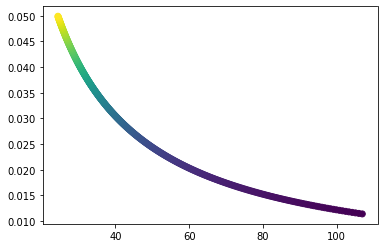

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.scatter(tempvals.neh,tempvals.pxt,c=tempvals.dif)

In [73]:
data.head()

NEH     pxt      RMSE  theo_A1/A0  exp_A1/A0  theo_t_A1/A0  \
33977   73  0.0167  0.003926    0.789174   0.765316      2.029366   
34445   74  0.0165  0.003929    0.789174   0.765316      2.031047   
32574   70  0.0174  0.003930    0.789174   0.765316      2.029130   
33509   72  0.0169  0.003931    0.789174   0.765316      2.027279   
31639   68  0.0179  0.003935    0.789174   0.765316      2.028947   

       exp_t_A1/A0   NH  T_NEH    ria_0    ria_t     const   new_pxt  \
33977     1.957779  107     26  0.44958  0.13343  1.219099 -0.022652   
34445     1.957779  107     26  0.44958  0.13343  1.220999 -0.024246   
32574     1.957779  107     26  0.44958  0.13343  1.217999 -0.021729   
33509     1.957779  107     26  0.44958  0.13343  1.216799 -0.020723   
31639     1.957779  107     26  0.44958  0.13343  1.217199 -0.021058   

         new_neh  
33977 -53.818709  
34445 -50.359759  
32574 -56.053044  
33509 -58.717634  
31639 -57.800985

In [74]:
pxt_o=[const/neh for neh in range(1,100)]
pxt_t=[(1-ph)*(1-(ria_t/ria_0)**(1/neh)) for neh in range(1,100)]
pxt_dif=(abs(np.array(pxt_o)-np.array(pxt_t))**2)*np.array(range(1,100))

In [75]:
# plt.scatter(range(99),pxt_dif)

In [178]:
protien="FAS_MOUSE"
# protien="ACADV_MOUSE"
pep=pept[1]
print(pep)
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{1}_{protien}.csv")
data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{6}_{protien}.csv")
data3=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{24}_{protien}.csv")
data4=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{31}_{protien}.csv")

_DAMLENQTPELFQDVNKPK_3


In [179]:
data1.head()

NEH     pxt      RMSE  theo_A1/A0  exp_A1/A0  theo_t_A1/A0  exp_t_A1/A0  \
0    1  0.0030  0.031045    1.210675   1.260351      1.213685     1.361332   
1    1  0.0031  0.031033    1.210675   1.260351      1.213786     1.361332   
2    1  0.0032  0.031021    1.210675   1.260351      1.213886     1.361332   
3    1  0.0033  0.031010    1.210675   1.260351      1.213987     1.361332   
4    1  0.0034  0.030998    1.210675   1.260351      1.214088     1.361332   

    NH  T_NEH     ria_0     ria_t  
0  154     37  0.259475  0.216591  
1  154     37  0.259475  0.216591  
2  154     37  0.259475  0.216591  
3  154     37  0.259475  0.216591  
4  154     37  0.259475  0.216591

In [180]:
ria_r=data1.ria_t[0]/data2.ria_t[0]
ria_r_12=data1.ria_t[0]/data2.ria_t[0]
ria_r_13=data1.ria_t[0]/data3.ria_t[0]
ria_r_14=data1.ria_t[0]/data4.ria_t[0]
ria_r_23=data2.ria_t[0]/data3.ria_t[0]
ria_r_24=data2.ria_t[0]/data4.ria_t[0]
ria_r_34=data3.ria_t[0]/data4.ria_t[0]

neh=range(1,100)
pxt=[(x/1000) for x in list(range(1,50,1))]

In [181]:
res=[]
for neh in range(1,100):
    print(neh)
    for pxt1 in pxt:
        for pxt2 in [(x/1000) for x in list(range(int(pxt1*1000),50,1))]:
            for pxt3 in [(x/1000) for x in list(range(int(pxt2*1000),50,1))]:
                for pxt4 in [(x/1000) for x in list(range(int(pxt3*1000),50,1))]:
                    diff=(abs(ria_r_12 - (( (1-ph-pxt1)/(1-ph-pxt2) )** neh)))
                    diff+=(abs(ria_r_13 - (( (1-ph-pxt1)/(1-ph-pxt3) )** neh)))
                    diff+=(abs(ria_r_14 - (( (1-ph-pxt1)/(1-ph-pxt4) )** neh)))
                    diff+=(abs(ria_r_23 - (( (1-ph-pxt2)/(2-ph-pxt3) )** neh)))
                    diff+=(abs(ria_r_24 - (( (1-ph-pxt2)/(2-ph-pxt4) )** neh)))
                    diff+=(abs(ria_r_34 - (( (1-ph-pxt3)/(2-ph-pxt4) )** neh)))

                    res.append([neh,pxt1,pxt2,pxt3,pxt4,diff])          
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [182]:
res=pd.DataFrame(res)
res.columns=["neh","pxt1","pxt2","pxt3","pxt4","dif"]
res=res.sort_values(by="dif")
res.head(30)

neh   pxt1   pxt2   pxt3   pxt4       dif
18071257   67  0.015  0.031  0.034  0.037  4.024248
18152954   68  0.001  0.017  0.020  0.023  4.027180
13693789   51  0.010  0.031  0.035  0.039  4.029491
10633180   40  0.004  0.031  0.036  0.041  4.029656
18078584   67  0.016  0.032  0.035  0.038  4.029750
10615679   40  0.003  0.030  0.035  0.040  4.030478
13682103   51  0.009  0.030  0.034  0.038  4.030660
9785299    37  0.002  0.031  0.037  0.042  4.031317
18173112   68  0.002  0.018  0.021  0.024  4.032611
18063280   67  0.014  0.030  0.033  0.036  4.032683
13704635   51  0.011  0.032  0.036  0.040  4.033517
13669535   51  0.008  0.029  0.033  0.037  4.033988
10649580   40  0.005  0.032  0.037  0.042  4.035150
18085297   67  0.017  0.033  0.036  0.039  4.035272
9765495    37  0.001  0.030  0.036  0.041  4.035588
13191204   49  0.014  0.036  0.040  0.044  4.036064
26254237   97  0.031  0.042  0.044  0.046  4.036237
26498482   98  0.021  0.032  0.034  0.036  4.037031
26696502   99  0.011  0.022  0.024  0.026  4.037807
18192061   68  0.003  0.019  0.022  0.025  4.038061
13182652   49  0.013  0.035  0.039  0.043  4.038945
10597029   40  0.002  0.029  0.034  0.039  4.039043
13714682   51  0.012  0.033  0.037  0.041  4.039044
26706786   99  0.012  0.023  0.025  0.027  4.039892
9803907    37  0.003  0.032  0.038  0.043  4.040114
26502711   98  0.022  0.033  0.035  0.037  4.040415
10664926   40  0.006  0.033  0.038  0.043  4.040663
18091431   67  0.018  0.034  0.037  0.040  4.040814
26255411   97  0.032  0.043  0.045  0.047  4.040950
10326530   39  0.002  0.030  0.035  0.040  4.041166

In [183]:
res["ria_0"]=data1.ria_0[0]
res["ria_t_1"]=data1.ria_t[0]
res["ria_t_2"]=data2.ria_t[0]
res["ria_t_3"]=data3.ria_t[0]
res["ria_t_4"]=data4.ria_t[0]

res["ria_t_1_e"]=res.ria_0* (1 - (res.pxt1/(1-ph)))**res.neh
res["ria_t_2_e"]=res.ria_0* (1 - (res.pxt2/(1-ph)))**res.neh
res["ria_t_3_e"]=res.ria_0* (1 - (res.pxt3/(1-ph)))**res.neh
res["ria_t_4_e"]=res.ria_0* (1 - (res.pxt4/(1-ph)))**res.neh

res["ria_diff"]=abs(res["ria_t_1"] - res["ria_t_1_e"]) + abs(res["ria_t_2"] - res["ria_t_2_e"])+ abs(res["ria_t_3"] - res["ria_t_3_e"])+ abs(res["ria_t_4"] - res["ria_t_4_e"])
res=res.sort_values(by="ria_diff")
res.head(30)

neh   pxt1   pxt2   pxt3   pxt4       dif     ria_0   ria_t_1  \
11986125   45  0.004  0.028  0.033  0.037  4.080686  0.259475  0.216591   
9567135    36  0.005  0.035  0.041  0.046  4.076527  0.259475  0.216591   
9567126    36  0.005  0.035  0.040  0.046  4.103485  0.259475  0.216591   
11986108   45  0.004  0.028  0.032  0.037  4.117762  0.259475  0.216591   
16027242   60  0.003  0.021  0.025  0.028  4.139416  0.259475  0.216591   
12256579   46  0.004  0.027  0.032  0.036  4.095675  0.259475  0.216591   
16027217   60  0.003  0.021  0.024  0.028  4.163122  0.259475  0.216591   
9296524    35  0.005  0.036  0.042  0.047  4.103545  0.259475  0.216591   
9837730    37  0.005  0.034  0.040  0.045  4.062074  0.259475  0.216591   
9567015    36  0.005  0.034  0.041  0.046  4.136238  0.259475  0.216591   
9837720    37  0.005  0.034  0.039  0.045  4.105309  0.259475  0.216591   
9567134    36  0.005  0.035  0.041  0.045  4.231729  0.259475  0.216591   
9567136    36  0.005  0.035  0.041  0.047  4.251622  0.259475  0.216591   
15756517   59  0.003  0.021  0.025  0.028  4.130095  0.259475  0.216591   
11986124   45  0.004  0.028  0.033  0.036  4.262859  0.259475  0.216591   
11444924   43  0.004  0.029  0.034  0.039  4.117388  0.259475  0.216591   
9025899    34  0.005  0.037  0.043  0.049  4.199995  0.259475  0.216591   
9567006    36  0.005  0.034  0.040  0.046  4.163195  0.259475  0.216591   
9296525    35  0.005  0.036  0.042  0.048  4.237426  0.259475  0.216591   
11986126   45  0.004  0.028  0.033  0.038  4.298792  0.259475  0.216591   
9567143    36  0.005  0.035  0.042  0.046  4.220811  0.259475  0.216591   
12256832   46  0.004  0.028  0.032  0.036  4.125195  0.259475  0.216591   
9567125    36  0.005  0.035  0.040  0.045  4.258687  0.259475  0.216591   
16568231   62  0.003  0.020  0.024  0.027  4.111964  0.259475  0.216591   
9567127    36  0.005  0.035  0.040  0.047  4.278580  0.259475  0.216591   
9296516    35  0.005  0.036  0.041  0.047  4.129343  0.259475  0.216591   
16297941   61  0.003  0.021  0.024  0.027  4.211553  0.259475  0.216591   
15215498   57  0.003  0.022  0.026  0.029  4.100303  0.259475  0.216591   
11715632   44  0.004  0.029  0.033  0.038  4.174435  0.259475  0.216591   
9837729    37  0.005  0.034  0.040  0.044  4.192039  0.259475  0.216591   

          ria_t_2   ria_t_3   ria_t_4  ria_t_1_e  ria_t_2_e  ria_t_3_e  \
11986125  0.07254  0.058328  0.047674   0.216648   0.072275   0.057304   
9567135   0.07254  0.058328  0.047674   0.216628   0.071943   0.057473   
9567126   0.07254  0.058328  0.047674   0.216628   0.071943   0.059670   
11986108  0.07254  0.058328  0.047674   0.216648   0.072275   0.060032   
16027242  0.07254  0.058328  0.047674   0.216667   0.072606   0.056790   
12256579  0.07254  0.058328  0.047674   0.215781   0.073655   0.058111   
16027217  0.07254  0.058328  0.047674   0.216667   0.072606   0.060393   
9296524   0.07254  0.058328  0.047674   0.217717   0.071896   0.057781   
9837730   0.07254  0.058328  0.047674   0.215545   0.072138   0.057283   
9567015   0.07254  0.058328  0.047674   0.216628   0.074677   0.057473   
9837720   0.07254  0.058328  0.047674   0.215545   0.072138   0.059533   
9567134   0.07254  0.058328  0.047674   0.216628   0.071943   0.057473   
9567136   0.07254  0.058328  0.047674   0.216628   0.071943   0.057473   
15756517  0.07254  0.058328  0.047674   0.217319   0.074163   0.058246   
11986124  0.07254  0.058328  0.047674   0.216648   0.072275   0.057304   
11444924  0.07254  0.058328  0.047674   0.218391   0.073187   0.058615   
9025899   0.07254  0.058328  0.047674   0.218811   0.071995   0.058210   
9567006   0.07254  0.058328  0.047674   0.216628   0.074677   0.059670   
9296525   0.07254  0.058328  0.047674   0.217717   0.071896   0.057781   
11986126  0.07254  0.058328  0.047674   0.216648   0.072275   0.057304   
9567143   0.07254  0.058328  0.047674   0.216628   0.071943   0.055354   
12256832  0.07254  0.058328  0.047674   0.215781   0.070

In [66]:
# original=pd.merge(pd.DataFrame([range(1,100)]).transpose(),pd.DataFrame([(x/1000) for x in list(range(1,50,1))]), how='cross')
# original.columns=["neh","pxt"]
# original

In [56]:
# m=pd.merge(original,original,how='cross',suffixes = ('_1', '_2'))
# m=m[m.neh_1==m.neh_2]
# m=m.drop(columns=["neh_2"])

# m.head()

In [57]:
# m=pd.merge(m,original,how='cross')

In [173]:
protien="FAS_MOUSE"
# protien="ACADV_MOUSE"
pep=pept[7]
print(pep)
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{1}_{protien}.csv")
data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{2}_{protien}.csv")
data3=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{3}_{protien}.csv")
data4=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{6}_{protien}.csv")
data5=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{7}_{protien}.csv")
data6=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{9}_{protien}.csv")
data7=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{13}_{protien}.csv")
data8=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{16}_{protien}.csv")
data9=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{21}_{protien}.csv")
data10=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{24}_{protien}.csv")
data11=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{31}_{protien}.csv")
data1.head()

_LKEDTQVADVTTSR_3


NEH     pxt      RMSE  theo_A1/A0  exp_A1/A0  theo_t_A1/A0  exp_t_A1/A0  \
0    1  0.0030  0.028749    0.814094   0.794509      0.817104     0.947272   
1    1  0.0031  0.028730    0.814094   0.794509      0.817205     0.947272   
2    1  0.0032  0.028710    0.814094   0.794509      0.817305     0.947272   
3    1  0.0033  0.028691    0.814094   0.794509      0.817406     0.947272   
4    1  0.0034  0.028672    0.814094   0.794509      0.817507     0.947272   

    NH  T_NEH     ria_0     ria_t  
0  112     24  0.432143  0.361059  
1  112     24  0.432143  0.361059  
2  112     24  0.432143  0.361059  
3  112     24  0.432143  0.361059  
4  112     24  0.432143  0.361059

In [174]:
ria_r=data1.ria_t[0]/data2.ria_t[0]
ria_r_12=data1.ria_t[0]/data2.ria_t[0]
ria_r_13=data1.ria_t[0]/data3.ria_t[0]
ria_r_14=data1.ria_t[0]/data4.ria_t[0] 
ria_r_15=data1.ria_t[0]/data5.ria_t[0] 
ria_r_16=data1.ria_t[0]/data6.ria_t[0] 
ria_r_17=data1.ria_t[0]/data7.ria_t[0] 
ria_r_18=data1.ria_t[0]/data8.ria_t[0] 
ria_r_19=data1.ria_t[0]/data9.ria_t[0] 
ria_r_110=data1.ria_t[0]/data10.ria_t[0] 
ria_r_111=data1.ria_t[0]/data11.ria_t[0] 

neh=range(1,100)
pxt=[(x/10000) for x in list(range(1,50,1))]

In [175]:
# pxt_1=0.0049
# neh=30
# pxt_2= 1-ph - ((1-ph-pxt_1)/(ria_r_12 ** (1/neh)))
# pxt_3= 1-ph - ((1-ph-pxt_1)/(ria_r_13 ** (1/neh)))
# pxt_4= 1-ph - ((1-ph-pxt_1)/(ria_r_14 ** (1/neh)))
# print(pxt_1,pxt_2,pxt_3,pxt_4)

In [177]:
res=[]
for neh in range(1,100): 
    for pxt_1 in pxt:
        pxt_2= 1-ph - ((1-ph-pxt_1)/(ria_r_12 ** (1/neh)))
        pxt_3= 1-ph - ((1-ph-pxt_1)/(ria_r_13 ** (1/neh)))
        pxt_4= 1-ph - ((1-ph-pxt_1)/(ria_r_14 ** (1/neh)))
        
        pxt_5= 1-ph - ((1-ph-pxt_1)/(ria_r_15 ** (1/neh)))
        pxt_6= 1-ph - ((1-ph-pxt_1)/(ria_r_16 ** (1/neh)))
        pxt_7= 1-ph - ((1-ph-pxt_1)/(ria_r_17 ** (1/neh)))
        pxt_8= 1-ph - ((1-ph-pxt_1)/(ria_r_18 ** (1/neh)))
        pxt_9= 1-ph - ((1-ph-pxt_1)/(ria_r_19 ** (1/neh)))
        pxt_10= 1-ph - ((1-ph-pxt_1)/(ria_r_110 ** (1/neh)))
        pxt_11= 1-ph - ((1-ph-pxt_1)/(ria_r_111 ** (1/neh)))
        
        res.append([neh,pxt_1,pxt_2,pxt_3,pxt_4,pxt_5,pxt_6,pxt_7,pxt_8,pxt_9,pxt_10,pxt_11])    

res=pd.DataFrame(res)
res.columns=["neh","pxt1","pxt2","pxt3","pxt4","pxt5","pxt6","pxt7","pxt8","pxt9","pxt10","pxt11"] 

res["ria_0"]=data1.ria_0[0]
res["ria_t_1"]=data1.ria_t[0]
res["ria_t_2"]=data2.ria_t[0]
res["ria_t_3"]=data3.ria_t[0]
res["ria_t_4"]=data4.ria_t[0]

res["ria_t_5"]=data5.ria_t[0]
res["ria_t_6"]=data6.ria_t[0]
res["ria_t_7"]=data7.ria_t[0]
res["ria_t_8"]=data8.ria_t[0]
res["ria_t_9"]=data9.ria_t[0]
res["ria_t_10"]=data10.ria_t[0]
res["ria_t_11"]=data11.ria_t[0]

res["ria_t_1_e"]=res.ria_0* (1 - (res.pxt1/(1-ph)))**res.neh
res["ria_t_2_e"]=res.ria_0* (1 - (res.pxt2/(1-ph)))**res.neh
res["ria_t_3_e"]=res.ria_0* (1 - (res.pxt3/(1-ph)))**res.neh
res["ria_t_4_e"]=res.ria_0* (1 - (res.pxt4/(1-ph)))**res.neh

res["ria_t_5_e"]=res.ria_0* (1 - (res.pxt5/(1-ph)))**res.neh
res["ria_t_6_e"]=res.ria_0* (1 - (res.pxt6/(1-ph)))**res.neh
res["ria_t_7_e"]=res.ria_0* (1 - (res.pxt7/(1-ph)))**res.neh
res["ria_t_8_e"]=res.ria_0* (1 - (res.pxt8/(1-ph)))**res.neh
res["ria_t_9_e"]=res.ria_0* (1 - (res.pxt9/(1-ph)))**res.neh
res["ria_t_10_e"]=res.ria_0* (1 - (res.pxt10/(1-ph)))**res.neh
res["ria_t_11_e"]=res.ria_0* (1 - (res.pxt11/(1-ph)))**res.neh

res["ria_diff"]=(abs(res["ria_t_1"] - res["ria_t_1_e"]) + abs(res["ria_t_2"] - res["ria_t_2_e"])+ abs(res["ria_t_3"] - res["ria_t_3_e"])+ abs(res["ria_t_4"] - res["ria_t_4_e"])
                + abs(res["ria_t_5"] - res["ria_t_5_e"])+ abs(res["ria_t_6"] - res["ria_t_6_e"])+ abs(res["ria_t_7"] - res["ria_t_7_e"])+ abs(res["ria_t_8"] - res["ria_t_8_e"])
                + abs(res["ria_t_9"] - res["ria_t_9_e"])+ abs(res["ria_t_10"] - res["ria_t_10_e"])+ abs(res["ria_t_11"] - res["ria_t_11_e"]))
res=res.sort_values(by="ria_diff")
res.head(10)

neh    pxt1      pxt2      pxt3      pxt4      pxt5      pxt6      pxt7  \
3357   69  0.0026  0.006256  0.005866  0.015285  0.013423  0.015326  0.016756   
2243   46  0.0039  0.009372  0.008789  0.022842  0.020069  0.022903  0.025031   
3795   78  0.0023  0.005536  0.005191  0.013533  0.011883  0.013569  0.014837   
1907   39  0.0046  0.011047  0.010359  0.026888  0.023630  0.026959  0.029458   
2726   56  0.0032  0.007701  0.007220  0.018797  0.016511  0.018847  0.020603   
3114   64  0.0028  0.006741  0.006320  0.016466  0.014461  0.016510  0.018050   
3017   62  0.0029  0.006967  0.006533  0.017003  0.014934  0.017048  0.018637   
2823   58  0.0031  0.007446  0.006982  0.018165  0.015956  0.018213  0.019909   
4380   90  0.0020  0.004806  0.004506  0.011745  0.010313  0.011777  0.012877   
3649   75  0.0024  0.005765  0.005406  0.014078  0.012364  0.014116  0.015433   

          pxt8      pxt9  ...  ria_t_3_e  ria_t_4_e  ria_t_5_e  ria_t_6_e  \
3357  0.018226  0.016485  ...   0.287939   0.149274   0.170058   0.148849   
2243  0.027216  0.024627  ...   0.287906   0.149257   0.170038   0.148831   
3795  0.016140  0.014596  ...   0.287947   0.149279   0.170063   0.148853   
1907  0.032024  0.028984  ...   0.287887   0.149248   0.170027   0.148822   
2726  0.022407  0.020270  ...   0.287981   0.149296   0.170083   0.148871   
3114  0.019633  0.017758  ...   0.287992   0.149302   0.170089   0.148876   
3017  0.020269  0.018335  ...   0.287816   0.149211   0.169985   0.148785   
2823  0.021652  0.019588  ...   0.287811   0.149208   0.169982   0.148783   
4380  0.014009  0.012669  ...   0.287782   0.149193   0.169965   0.148768   
3649  0.016788  0.015183  ...   0.287772   0.149188   0.169959   0.148762   

      ria_t_7_e  ria_t_8_e  ria_t_9_e  ria_t_10_e  ria_t_11_e  ria_diff  
3357   0.134642   0.121434   0.137231    0.131601    0.134561  0.000108  
2243   0.134626   0.121419   0.137215    0.131585    0.134545  0.000133  
3795   0.134646   0.121437   0.137234    0.131604    0.134565  0.000164  
1907   0.134618   0.121412   0.137206    0.131577    0.134537  0.000263  
2726   0.134662   0.121451   0.137251    0.131620    0.134581  0.000409  
3114   0.134667   0.121456   0.137256    0.131625    0.134585  0.000483  
3017   0.134585   0.121382   0.137172    0.131545    0.134503  0.000771  
2823   0.134582   0.121380   0.137170    0.131542    0.134501  0.000809  
4380   0.134568   0.121367   0.137156    0.131529    0.134487  0.001016  
3649   0.134564   0.121363   0.137151    0.131524    0.134483  0.001090  

[10 rows x 36 columns]